Here's a multi-faceted approach to tackling this problem:

Data Exploration
Basic Statistics: Use df.describe() to see basic statistics like mean, median, and standard deviation for each column.
Missing Values: Use df.isnull().sum() to check for missing values.

Feature Engineering
Time Features: Add features like moving averages, RSI, MACD, etc., that are commonly used in stock price prediction.
Lag Features: For time-series data, past values (lags) are often useful.
Encoding: If needed, encode categorical variables like stock_id.

Model Selection
Linear Models: Start with simpler models like Linear Regression for baseline.
Tree-based Models: RandomForest, XGBoost are good for capturing non-linear relationships.
Time-Series Models: ARIMA, LSTM are specialized for time-series data.

Evaluation Metric
RMSE: Commonly used for continuous outcomes.
Custom Metric: If there's a specific financial metric you're interested in, consider creating a custom evaluation function.

Validation Strategy
Time-based Split: Given this is time-series data, split the data in a time-based manner for validation.
Cross-validation: Use time-series cross-validation if you have enough data.

Hyperparameter Tuning
Grid Search: Test multiple combinations of hyperparameters.
Random Search: More efficient than Grid Search but less exhaustive.

Model Deployment
API: After model training, you can deploy it using REST APIs with Flask or FastAPI.
Batch Prediction: If real-time prediction is not required, you can run batch predictions.

Risk Management
Backtesting: Before using the model for actual trading, perform backtesting on historical data to understand how the model would have performed.
Alerts: Set up automated alerts for extreme predictions that could be outliers or errors.

Ongoing Maintenance
Retraining: Financial markets change, so retrain the model at regular intervals.
Monitoring: Keep an eye on the model's performance and make adjustments as needed.
This approach offers multiple angles for model development, evaluation, and deployment.

For further reading, you can refer to the following:

For statistical tests and feature engineering: "Practical Time Series Analysis"
For machine learning models: Scikit-Learn User Guide
For neural networks: Deep Learning for Time Series Forecasting

In [1]:
# Step 1: Import the pandas library
import pandas as pd

# Step 2: Load the CSV file into a DataFrame
df = pd.read_csv('train.csv')  # Replace 'your_file.csv' with your file's path

# Step 3: Print the first 5 rows
print(df.head())


   stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 

In [3]:
# Basic Statistics
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
           stock_id       date_id  seconds_in_bucket  imbalance_size  \
count  5.237980e+06  5.237980e+06       5.237980e+06    5.237760e+06   
mean   9.928856e+01  2.415100e+02       2.700000e+02    5.715293e+06   
std    5.787176e+01  1.385319e+02       1.587451e+02    2.051591e+07   
min    0.000000e+00  0.000000e+00       0.000000e+00    0.000000e+00   
25%    4.900000e+01  1.220000e+02       1.300000e+02    8.453415e+04   
50%    9.900000e+01  2.420000e+02       2.700000e+02    1.113604e+06   
75%    1.490000e+02  3.610000e+02       4.100000e+02    4.190951e+06   
max    1.990000e+02  4.800000e+02       5.400000e+02    2.982028e+09   

       imbalance_buy_sell_flag  reference_price  matched_size     far_price  \
count             5.237980e+06     5.237760e+06  5.237760e+06  2.343638e+06   
mean             -1.189619e-02     9.999955e-01  4.510025e+07  1.001713e+00   
std               8.853374e-01     2.532497e-03  1.398413e+08  7.214705e-01   
min              

In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train = df.copy() # make a copy of df

You raise an important point. Missing values can sometimes carry information, and imputing them blindly may introduce bias or noise into the model. Here are some options you have:

Option 1: Analyze the Nature of the Missing Data
Try to understand why the data might be missing. If the missingness is completely random, imputation methods like mean or median could work. If the missingness is systematic, then filling it in could skew the results.

Option 2: Drop Missing Values
If the missing data is substantial and imputing it might introduce more noise than signal, you could consider dropping those rows or columns. However, this approach could lead to a loss of valuable data.

python
Copy code
Drop rows where any of the selected columns have missing values
df.dropna(subset=['imbalance_size', 'reference_price', 'matched_size'], inplace=True)
Option 3: Use Advanced Imputation Methods
You can use more sophisticated techniques like K-Nearest Neighbors (KNN) or Multiple Imputation to fill missing values based on other observations.

python
Copy code
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
Option 4: Use Model to Handle Missing Data
Some machine learning algorithms can handle missing data without requiring imputation. For example, tree-based models like Random Forest or XGBoost.

Given your options, you might consider a mix. For example, you could analyze 'far_price' and 'near_price' to understand their missingness, and depending on that, choose to drop or impute them. For 'imbalance_size', 'reference_price', and 'matched_size', since only 220 rows are missing out of presumably a larger dataset, mean or median imputation might be a safe bet unless the columns are of significant importance.

Choose the approach that makes the most sense given your specific context and the nature of each feature with missing values.

In [6]:
features = ['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 
            'imbalance_buy_sell_flag', 'reference_price', 'matched_size']
target = ['target']

In [7]:
# handle missing values

# Drop rows with missing 'target' values
train.dropna(subset=['target'], inplace=True)

# Mean imputation
train['imbalance_size'].fillna(df['imbalance_size'].mean(), inplace=True)
train['reference_price'].fillna(df['reference_price'].mean(), inplace=True)
train['matched_size'].fillna(df['matched_size'].mean(), inplace=True)
train['bid_price'].fillna(df['bid_price'].mean(), inplace=True)
train['ask_price'].fillna(df['ask_price'].mean(), inplace=True)
train['wap'].fillna(df['wap'].mean(), inplace=True)


train['far_price'].fillna(-1, inplace=True)
train['near_price'].fillna(-1, inplace=True)



In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

    
def plot_scatter(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.3, label='Predictions')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted for {model_name}')
    plt.legend()

    # Get current axes limits to define the ends of the reference line
    ax = plt.gca()
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()

    # Draw a dashed line through the origin with the same limits as the current axes
    plt.axhline(0, color='k', linestyle='--', alpha=0.2)  # Horizontal line at y=0
    plt.axvline(0, color='k', linestyle='--', alpha=0.2)  # Vertical line at x=0
    plt.axline((0, 0), slope=1, color='k', linestyle='--', label='Perfect Fit') # Line at x=y

    plt.legend()
    plt.show()


    
def plot_residue(y_test, y_pred, model_name):
    residuals = y_test - y_pred

    plt.scatter(y_pred, residuals, alpha=0.3, label='Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
    plt.legend()
    plt.show()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train[target], test_size=0.2, random_state=42)


In [21]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = lr_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 6.403237215789367


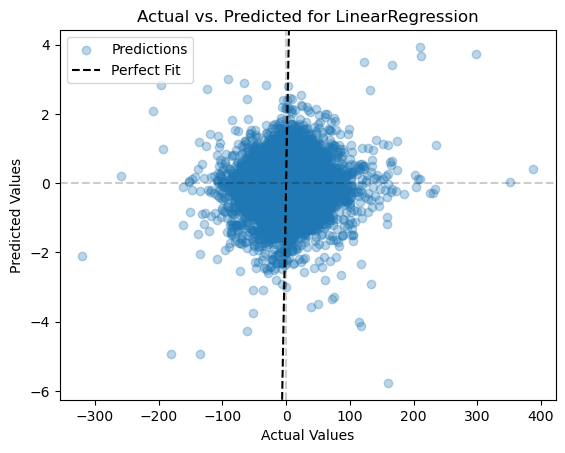

LinearRegression - MAE: 6.403237227800439, RMSE: 9.434295336233196, R²: 0.0007353488459372892


In [86]:
# Assuming lr_model is your trained Linear Regression model
y_pred_lr = lr_model.predict(X_test)
mae, rmse, r2 = calculate_metrics(y_test, y_pred_lr)

plot_scatter(y_test, y_pred_lr, 'LinearRegression')

print(f"LinearRegression - MAE: {mae}, RMSE: {rmse}, R²: {r2}")


In a scatter plot comparing actual versus predicted values for a regression model:

Each blue dot represents a single prediction by the model. The position of the dot on the X-axis indicates the actual value from the test dataset, while the position on the Y-axis indicates the predicted value generated by the model for that same data point.

The reference line is typically a straight line where the predicted values are equal to the actual values. This is known as the line of perfect prediction. In the graph, it's usually drawn as a dashed line diagonally across the plot.

Interpreting the Plot
Dots on the Line: If a blue dot lies exactly on the reference line, it means the model's prediction for that particular data point was perfect — the predicted value equals the actual value.

Dots above the Line: If a dot is above the reference line, the model overestimated the value. The vertical distance from the dot to the line represents the magnitude of the overestimation.

Dots below the Line: Conversely, if a dot is below the reference line, the model underestimated the value, with the vertical distance indicating the error magnitude.

Ideal Scenario
In an ideal scenario, all dots would lie directly on the reference line, indicating that the model predicts the actual value perfectly every time. However, this is almost never the case in real-world scenarios due to the complexity and noise inherent in the data.

Conclusion
This graph is a visual tool to quickly assess the accuracy of a regression model's predictions. The closer the dots are to the reference line, the more accurate the predictions. Conversely, if many dots are far from the line, it suggests the model's predictions are often inaccurate. The overall pattern can also suggest whether there are systematic errors in the model's predictions, such as consistently over or underestimating across certain ranges of values.

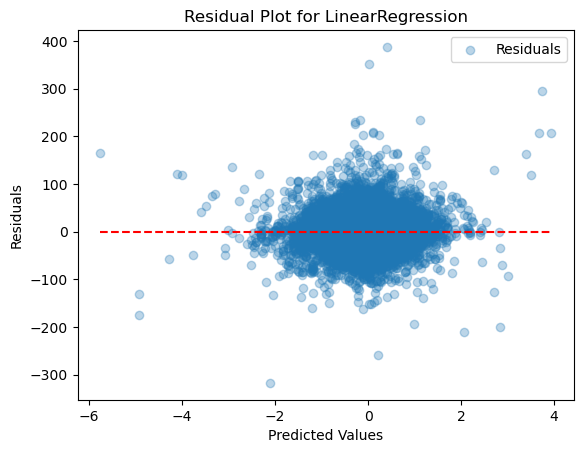

In [45]:
plot_residue(y_test, y_pred_lr, 'LinearRegression')

The residual plot you have provided is used to assess the performance of a regression model. It plots the difference between the actual and predicted values (residuals) against the predicted values. Here’s how to interpret it:

Residuals: The vertical axis shows the residuals, which are the differences between the actual values (y_test) and the predicted values (y_pred). A residual is positive if the prediction is lower than the actual value (underprediction) and negative if it is higher (overprediction).

Predicted Values: The horizontal axis represents the predicted values. It helps to determine if there are any patterns in the residuals across different predicted values.

Horizontal Line at Zero: The dashed horizontal line at zero represents no error. If a point lies on this line, it means the prediction was exactly correct for that instance.

Significance of Patterns in the Residual Plot:
Random Distribution: Ideally, the residuals should be randomly distributed around the horizontal line, indicating that the model's errors are distributed randomly and the model predicts equally well across all values.

Systematic Patterns: If there are systematic patterns, such as a curve or a distinct shape, this suggests that the model is not capturing some aspect of the data's structure. This could be due to model being too simple (underfitting), incorrect assumptions about the data, or the need for feature transformation.

Homoscedasticity: If the spread of the residuals is consistent across the range of predicted values, the model is homoscedastic. This is a good indication that the model is stable across different levels of prediction.

Heteroscedasticity: If the residuals fan out or in (variance changes with the level of prediction), this indicates heteroscedasticity, suggesting that the model’s performance varies at different levels of prediction. This can be a sign that the model may benefit from transformations of the dependent variable or the addition of features that can explain the variance at different levels.

Outliers: Points that are far from the horizontal line are outliers. They can have a disproportionate impact on the model and may warrant further investigation.

Suggested Machine Learning Techniques:
Given that you're working with time-series data and the task is to predict a continuous value (the future price movement), regression algorithms are suitable for this problem. Here are some techniques to consider:

Linear Regression: This is the simplest form and quick to implement. It will provide you with a baseline model.

Random Forest Regression: This ensemble method is good for capturing complex relationships in the data without requiring much feature scaling.

XGBoost or LightGBM for Regression: These are gradient boosting algorithms known for high performance in Kaggle competitions. They are highly customizable and typically yield very strong results.

LSTM (Long Short-Term Memory): Since this is time-series data, LSTM, which is a type of Recurrent Neural Network (RNN), can also be useful, but it may be computationally expensive.

ARIMA/SARIMA: These are classical statistical methods for time-series forecasting. They might be less applicable if your features exhibit complex nonlinear relationships, but they are excellent for univariate time-series prediction.

In [46]:
features = ['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 
            'imbalance_buy_sell_flag', 'reference_price', 'matched_size']
target = ['target']

print("Missing Values:")
print(df.isnull().sum())

train = df.copy()

Missing Values:
stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


In [51]:
# handle missing values

# Drop rows with missing 'target' values
train.dropna(subset=['target'], inplace=True)

from sklearn.impute import SimpleImputer

# Median imputer
median_imputer = SimpleImputer(strategy='median')

# Impute the missing values
df['imbalance_size'] = median_imputer.fit_transform(df[['imbalance_size']])
df['reference_price'] = median_imputer.fit_transform(df[['reference_price']])
df['matched_size'] = median_imputer.fit_transform(df[['matched_size']])

# Mean imputation
train['bid_price'].fillna(df['bid_price'].mean(), inplace=True)
train['ask_price'].fillna(df['ask_price'].mean(), inplace=True)
train['wap'].fillna(df['wap'].mean(), inplace=True)


train['far_price'].fillna(-1, inplace=True)
train['near_price'].fillna(-1, inplace=True)

# Drop rows with nan still values
train.dropna(subset=['imbalance_size'], inplace=True)

print("Missing Values:")
print(train.isnull().sum())

Missing Values:
stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target variables
X = train[features]
y = train['target']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [54]:
# Make predictions
y_pred = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.521780459778208


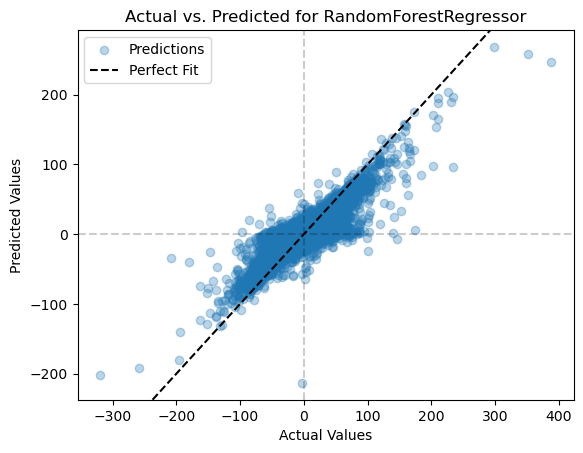

RandomForestRegressor - MAE: 2.410769798979481, RMSE: 4.062756941843704, R²: 0.814688115898921


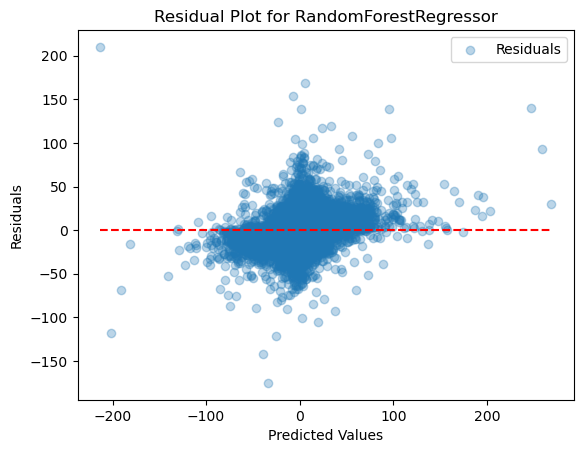

In [87]:
# Assuming rf_model is your trained Random Forest model
y_pred_rf = rf_model.predict(X_test)
mae, rmse, r2 = calculate_metrics(y_test, y_pred_rf)
plot_scatter(y_test, y_pred_rf, 'RandomForestRegressor')

print(f"RandomForestRegressor - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

plot_residue(y_test, y_pred_rf, 'RandomForestRegressor')

In [19]:
# Save the model
from joblib import dump
dump(rf_model, 'random_forest_model.joblib')



['random_forest_model.joblib']

In [21]:
# Load the model
from joblib import load
#loaded_rf_model = load('random_forest_model.joblib')


Significance of 4.5 MAE:
Given the statistics of your CSV file, the 'target' variable has a mean value of approximately -0.048 with a standard deviation of around 9.45.

Relative to the Mean and Standard Deviation: Considering that the standard deviation is approximately 9.45, an MAE of 4.5 signifies that your Random Forest model, on average, deviates from the actual values by about half a standard deviation. This is a moderate level of error and suggests that there may be room for improvement.

Comparison with Quartiles: The 25% and 75% quartile values for the 'target' are around -4.56 and 4.41, respectively. An MAE of 4.5 is pretty close to these quartile boundaries, indicating that your model's predictions are fairly accurate for a substantial portion of the data.

Business Context: Without specific business context, it's hard to say how critical this level of error might be. For some applications, a small error could be disastrous, while for others, it may be inconsequential.

Linear Regression vs. Random Forest:
Accuracy: Random Forest has a lower MAE (4.5) compared to Linear Regression (6.4), suggesting that Random Forest is better at minimizing the average absolute differences between the observed actual outcome values and the predictions made by the model.

Interpretability: Linear Regression models are generally easier to interpret. If you need to explain the model's decisions, you might opt for the simpler model, even if it is less accurate.

Feature Importance: Random Forest can capture complex relations between features and the target variable, which might be essential given the number of features you are dealing with.

Overfitting: Random Forest is less prone to overfitting compared to Linear Regression, especially if your dataset has non-linear relationships, but you need to be cautious with hyperparameter tuning.

Computation Time: Random Forest models can be computationally intensive. If computational resources or speed is a concern, Linear Regression could be more suitable.


What is Elastic Net?
Elastic Net is a linear regression algorithm that combines the penalties of Ridge and Lasso regression. It aims to minimize the complexity of the model by penalizing certain coefficients towards zero and/or exactly zero, thereby effectively reducing the number of variables upon which the given solution is dependent.


In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.svm import SVR


In [57]:
train = df.copy()

In [58]:
# handle missing values

from sklearn.impute import SimpleImputer

# Median imputer
median_imputer = SimpleImputer(strategy='median')

# Impute the missing values
df['imbalance_size'] = median_imputer.fit_transform(df[['imbalance_size']])
df['reference_price'] = median_imputer.fit_transform(df[['reference_price']])
df['matched_size'] = median_imputer.fit_transform(df[['matched_size']])


# Drop rows with missing 'target' values
train.dropna(subset=['target'], inplace=True)

# Mean imputation
train['bid_price'].fillna(df['bid_price'].mean(), inplace=True)
train['ask_price'].fillna(df['ask_price'].mean(), inplace=True)
train['wap'].fillna(df['wap'].mean(), inplace=True)


train['far_price'].fillna(-1, inplace=True)
train['near_price'].fillna(-1, inplace=True)

print("Missing Values:")
print(train.isnull().sum())

Missing Values:
stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64


In [59]:
X = train[['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size']]
y = train['target']


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
svr = SVR(kernel='rbf', C=1, gamma='scale')


In [ ]:
svr.fit(X_train, y_train)


In [ ]:
y_pred = svr.predict(X_test)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')



In [61]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [102]:
sgd_model = SGDRegressor(loss='squared_error', penalty='l1', alpha=0.0001, learning_rate='invscaling')


In [103]:
sgd_model.fit(X_train_scaled, y_train)


SGDRegressor(penalty='l1')

In [104]:
y_pred = sgd_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 6.405851476300323


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


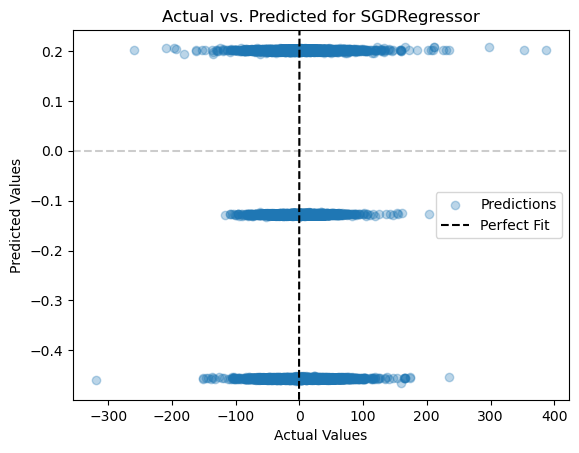

SGDRegressor - MAE: 6.406259335600405, RMSE: 9.43842538733609, R²: -0.0001397387507218184


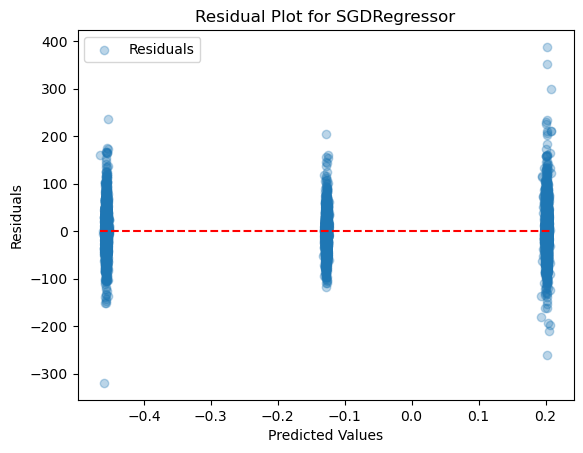

In [105]:
# Assuming rf_model is your trained Random Forest model
y_pred_sgd = sgd_model.predict(X_test)
mae, rmse, r2 = calculate_metrics(y_test, y_pred_sgd)
plot_scatter(y_test, y_pred_sgd, 'SGDRegressor')

print(f"SGDRegressor - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

plot_residue(y_test, y_pred_sgd, 'SGDRegressor')

In [67]:
pip install lightgbm


In [68]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Create an instance of LGBMRegressor
lgbm_reg = lgb.LGBMRegressor()

# Fit the model to the training data
lgbm_reg.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 4190313, number of used features: 7
[LightGBM] [Info] Start training from score -0.047912


LGBMRegressor()

In [69]:
# Make predictions
y_pred = lgbm_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 6.372533132061587


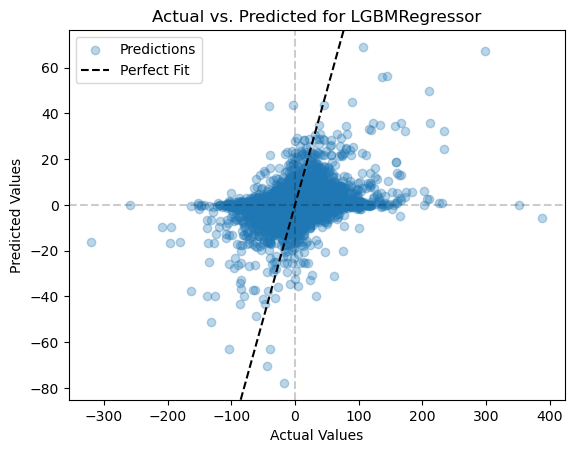

LGBMRegressor - MAE: 6.372533132061587, RMSE: 9.35763089796269, R²: 0.01690969921035501


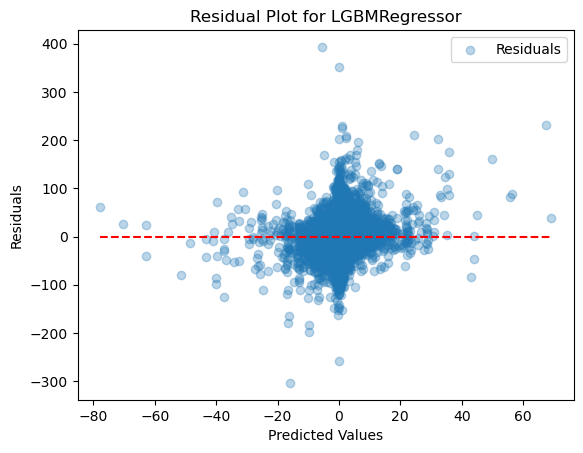

In [89]:
# Assuming rf_model is your trained Random Forest model
y_pred_lgbm = lgbm_reg.predict(X_test)
mae, rmse, r2 = calculate_metrics(y_test, y_pred_lgbm)
plot_scatter(y_test, y_pred_lgbm, 'LGBMRegressor')

print(f"LGBMRegressor - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

plot_residue(y_test, y_pred_lgbm, 'LGBMRegressor')

**_______________________________________________________________________________________________________________________**

Linear Regression Model:

The scatter plot shows a wide dispersion of points with a concentration around the line y = 0, which indicates poor prediction for extreme values.
The residual plot reinforces this finding with a large spread of residuals that don't cluster around zero, indicating inconsistent prediction errors across the range of predictions.
The metrics show a high MAE and RMSE, and an R² value close to zero, suggesting the model is not adequately capturing the underlying data structure.
Random Forest Regressor:

The scatter plot is more aligned with the y = x line, especially for values closer to zero, indicating better performance than the Linear Regression model.
The residual plot shows residuals more closely clustered around zero, implying more consistent predictions.
The metrics indicate a much lower MAE and RMSE, and an R² value substantially greater than zero, signifying a decent model fit.
SGD Regressor:

The scatter plot for the SGD Regressor is peculiar, with predictions forming a vertical line at x = 0, which suggests possible issues with the model's convergence or data scaling.
The residual plot for the SGD Regressor is not typical and suggests major issues, with a clear pattern in the residuals.
The metrics are extremely poor, with very high MAE and RMSE values, and a negative R², which usually indicates that the model is worse than a simple mean model.
LGBM Regressor:

The scatter plot for the LGBM Regressor shows a reasonable alignment with the y = x line but with some dispersion.
The residual plot indicates a concentration of residuals around zero, although there is some spread which suggests room for improvement.
The metrics show a moderate MAE and RMSE, and an R² value that is positive but low, suggesting the model has some predictive power but could potentially be improved further.
In conclusion, the Random Forest Regressor is performing relatively well compared to the other models, with more accurate predictions and consistent residuals. The Linear Regression model and the LGBM Regressor show signs of predictive ability but with more significant errors and room for improvement. The SGD Regressor's performance is highly questionable and likely indicates a fundamental issue with the model's training or the data provided to it.

# Now implementing Random forest with feature engineering and better null value handling. 
Handling Null Values:
far_price and near_price:

Filling missing far_price and near_price with -1 could be misleading for the model, as -1 might not be a natural value for prices. It's usually better to impute with a statistic like the median or mean, or even better, use a model-based imputation that can predict the missing values based on other variables.
imbalance_size, reference_price, matched_size:

Median imputation is a robust method for handling missing numerical data. However, it doesn't account for the variability in the data. A more nuanced approach might be to group by stock_id or date_id and impute using the median within each group, as this would preserve the stock- or date-specific characteristics.
bid_price, ask_price, wap:

Mean imputation is a simple and often effective approach, but like median imputation, it could be improved by grouping by stock_id or date_id. Alternatively, these might be interpolated if they follow a time series.

In [3]:
df = pd.read_csv('train.csv')

features = ['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size', 
            'imbalance_buy_sell_flag', 'reference_price', 'matched_size']
target = ['target']

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64


Improved Null Value Handling:
Impute far_price and near_price based on grouped medians: Instead of filling with -1, it might be better to use a median or mean based on stock_id as prices are often specific to each stock.

Use Model-Based Imputation: For prices and sizes, you could use more sophisticated imputation techniques like K-Nearest Neighbors or model-based imputation, which take into account the multivariate nature of the data. Random Forest Imputation: Some libraries offer imputation based on Random Forests (like MissForest in the missingpy package), which can sometimes be faster than KNN for large datasets.

Consider Time Series Interpolation: If seconds_in_bucket represents a time series for each stock_id, you might consider linear interpolation for missing values, especially for bid_price, ask_price, and wap.

In [109]:
pip install missingpy


     ---------------------------------------- 0.0/49.1 kB ? eta -:--:--
     ---------------------------------------- 49.1/49.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize IterativeImputer with RandomForestRegressor
#imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=42)

# Columns to impute using Iterative Imputer
#columns_to_impute = ['far_price', 'near_price', 'bid_price', 'ask_price', 'wap']

# Perform imputation
#df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Check missing values after imputation
print("Missing Values after Iterative Imputation:")
print(df[columns_to_impute].isnull().sum())


In [4]:
# Group by 'stock_id' and impute median for 'far_price' and 'near_price'
df['far_price'] = df.groupby('stock_id')['far_price'].transform(lambda x: x.fillna(x.median()))
df['near_price'] = df.groupby('stock_id')['near_price'].transform(lambda x: x.fillna(x.median()))


In [5]:
# Interpolate missing 'bid_price', 'ask_price', and 'wap' within each 'stock_id' group
df['bid_price'] = df.groupby('stock_id')['bid_price'].apply(lambda group: group.interpolate())
df['ask_price'] = df.groupby('stock_id')['ask_price'].apply(lambda group: group.interpolate())
df['wap'] = df.groupby('stock_id')['wap'].apply(lambda group: group.interpolate())


C:\Users\prana\AppData\Local\Temp\ipykernel_17608\2636782018.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['bid_price'] = df.groupby('stock_id')['bid_price'].apply(lambda group: group.interpolate())
C:\Users\prana\AppData\Local\Temp\ipykernel_17608\2636782018.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby

In [9]:

# Drop rows with missing 'target' values
df.dropna(subset=['target'], inplace=True)
df.dropna(subset=['imbalance_size'], inplace=True)

print("Missing Values:")
print(df.isnull().sum())

Missing Values:
stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64


#  Feature Engineering

Time Series Features:

If seconds_in_bucket represents time, consider generating features like sin and cos components to capture cyclical patterns within the time frame of a day.
Calculate the time elapsed since the opening of the market if date_id and seconds_in_bucket can be combined to represent a timestamp.
Interaction Features:

Create interaction terms between bid_price and ask_price to represent the spread.
Interact imbalance_size with imbalance_buy_sell_flag to differentiate the buy-side and sell-side imbalances.
Aggregated Features:

Group by stock_id and date_id to create aggregated features like average imbalance_size, bid_price, ask_price, etc., for each stock on each day.
Calculate rolling means or other statistics over seconds_in_bucket to capture short-term trends.
Indicator Variables:

Create binary indicators for extreme values in imbalance_size or large trade sizes in matched_size which might be outliers or special market events.

In [11]:
import numpy as np

# Interaction feature for bid-ask spread
df['bid_ask_spread'] = df['ask_price'] - df['bid_price']

# Group by 'stock_id' and impute median 'imbalance_size'
df['imbalance_size'] = df.groupby('stock_id')['imbalance_size'].transform(lambda x: x.fillna(x.median()))

# Cyclical time features
df['sin_time'] = np.sin(2 * np.pi * df['seconds_in_bucket']/df['seconds_in_bucket'].max())
df['cos_time'] = np.cos(2 * np.pi * df['seconds_in_bucket']/df['seconds_in_bucket'].max())


In [12]:
# Original features
features = [
    'stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
    'imbalance_buy_sell_flag', 'reference_price', 'matched_size'
]

# Adding new features
features.extend([
    'bid_ask_spread',  # Interaction feature for bid-ask spread
    'sin_time',        # Cyclical time feature based on sine transformation
    'cos_time'         # Cyclical time feature based on cosine transformation
])

# Target variable remains the same
target = ['target']


print("Missing Values:")
print(df.isnull().sum())

Missing Values:
stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
bid_ask_spread             0
sin_time                   0
cos_time                   0
dtype: int64


In [21]:
# Assuming the DataFrame 'df' has already been prepared with the new features and null values handled

# Define the features and target
features = [
    'stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
    'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
    'bid_ask_spread'#, 'sin_time', 'cos_time'
]
target = 'target'

# Split the data into features and target
X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MemoryError: Unable to allocate 160. MiB for an array with shape (4, 5237760) and data type int64

**Random Forest Parameters and Tuning**
The RandomForestRegressor has several parameters that can be tuned to optimize the model's performance. Here are some of the key parameters:

n_estimators: The number of trees in the forest. More trees can give you a more robust model, but it increases computational cost.

max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns but can also lead to overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Higher values prevent creating nodes that only fit to noise in the data.

min_samples_leaf: The minimum number of samples required to be at a leaf node. This parameter has a similar effect as min_samples_split.

max_features: The number of features to consider when looking for the best split. Choices include integers, float, 'auto', 'sqrt', 'log2', and None.

n_jobs: The number of jobs to run in parallel. '-1' means using all processors.

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50,random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


MemoryError: could not allocate 268435456 bytes

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


In [ ]:
# Assuming rf_model is your trained Random Forest model
#y_pred = rf_model.predict(X_test)
mae, rmse, r2 = calculate_metrics(y_test, y_pred)
plot_scatter(y_test, y_pred, 'RandomForestRegressor')

print(f"RandomForestRegressor - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

plot_residue(y_test, y_pred, 'RandomForestRegressor')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    # Add other parameters here
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")


**Step 1: Prepare Cross-Validation**
First, you choose a cross-validation strategy. The most common is k-fold cross-validation, where k is a user-specified number, usually 5 or 10.

**Step 2: Execute Cross-Validation**
Use cross_val_score to perform cross-validation. It requires the model, features, target, the number of folds, and a scoring function.

cross_val_score runs k-fold cross-validation for us, automatically splitting the data into k folds, training the model k times, and testing it k times, where each time, a different fold is used as the test set.
The scoring parameter is set to 'neg_mean_absolute_error', which means the cross-validation will evaluate the model using the negative mean absolute error. We use the negative mean absolute error because cross-validation in scikit-learn is designed to maximize a score, so scores like MAE, where lower is better, are negated to fit this convention.
The cv parameter determines the cross-validation splitting strategy. Here we use k-fold cross-validation with cv_folds specifying the number of folds.
After cross-validation, it is helpful to review the mean and standard deviation of the performance metric across all folds to get an idea of the model's average performance and variance, which indicates how stable the performance is across different subsets of the data.
This process provides a robust estimate of the performance of your model on unseen data by using different subsets of your data as the test set.

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=None, random_state=42)

# Define the number of folds for k-fold cross-validation
cv_folds = 5

# Execute cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=cv_folds, scoring='neg_mean_absolute_error')

# Convert scores to positive as 'neg_mean_absolute_error' returns negative values
cv_scores = -cv_scores

# Print out the mean and standard deviation of the cross-validation scores
print(f"MAE scores for each fold: {cv_scores}")
print(f"Mean MAE across all folds: {cv_scores.mean()}")
print(f"Standard deviation of MAE across all folds: {cv_scores.std()}")
